In [3]:
#Importing  the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [6]:
#Load the dataset
dataset = pd.read_excel(r'F:/PGDM-RBA/Summer Internship/Seller Center_SentimentAnalysis.xlsx')

dataset.head(20)

,Partner ID,Response,Sentiment
0,629694,the portal is very slow,Negative
1,635501,"""System runs very slow, not always accurate""",Negative
2,10000000172,The website does not function well and freezes...,Negative
3,10000000195,"""The delivery metrics are very delayed,",Negative
4,10000000195,you can not delete SKU's,Negative
5,10000000195,and the refund process and information is hard...,Negative
6,10000000243,Some features are not available,Negative
7,10000000280,good website to shop from\n,Positive
8,10000000316,"""too hard to navigate at product level.",Negative
9,10000000316,have to switch from sellerfulfilled to WFS and...,Negative


In [5]:
dataset.shape

(3619, 3)

Percentage for Sentiment

Negative    69.218
Positive    28.654
Neutral      2.128
Name: Sentiment, dtype: float64


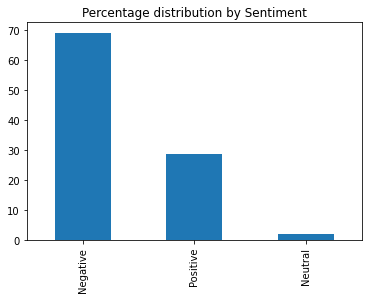

In [4]:
#Checking for the distribution of Sentiments
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentage for Sentiment\n")
print(round(dataset.Sentiment.value_counts(normalize=True)*100,3))
round(dataset.Sentiment.value_counts(normalize=True)*100,3).plot(kind='bar')
plt.title('Percentage distribution by Sentiment')
plt.show()

In [5]:
#data cleaning
import re

#This function converts to lower case and removes punctuations
def text_clean_1(text):
    text=text.lower()
    text= re.sub(r'[?!".;:,#@-]', '', text)
    return text
cleaned1= lambda x: text_clean_1(x)

In [6]:
#Lets take a look at the updated text
dataset['cleaned_Response']=pd.DataFrame(dataset.Response.apply(cleaned1))
dataset.head()

,Partner ID,Response,Sentiment,cleaned_Response
0,629694,the portal is very slow,Negative,the portal is very slow
1,635501,"""System runs very slow, not always accurate""",Negative,system runs very slow not always accurate
2,10000000172,The website does not function well and freezes...,Negative,the website does not function well and freezes...
3,10000000195,"""The delivery metrics are very delayed,",Negative,the delivery metrics are very delayed
4,10000000195,you can not delete SKU's,Negative,you can not delete sku's


In [7]:
from sklearn.model_selection import train_test_split

Independent_variable = dataset.cleaned_Response
Dependent_variable = dataset.Sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_variable, Dependent_variable, test_size = 0.2, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test :', len(DV_test))


IV_train : 2895
IV_test : 724
DV_train : 2895
DV_test : 724


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline


In [9]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [12]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[489,  20,  32],
       [  0,   0,   0],
       [ 10,   3, 170]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9102209944751382
Precision :  0.9449837259991236
Recall :  0.9102209944751382


C:\Users\shree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
example = ["The website is not working well"]
result=model.predict(example)
print(result)

['Negative']


In [15]:
example2 = ["easy to deal with"]
result=model.predict(example2)
print(result)

['Positive']


In [16]:
example2 = ["easy to understand"]
result=model.predict(example2)
print(result)

['Positive']


In [17]:
example2 = ["not able to add sku's"]
result=model.predict(example2)
print(result)

['Negative']
